# Stock Market Analysis for Tech Stocks


In this project, we'll analyse data from the stock market for some technology stocks.

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions we'll try to answer:

What was the change in a stock's price over time?
What was the daily return average of a stock?
What was the moving average of various stocks?
What was the correlation between daily returns of different stocks?
How much value do we put at risk by investing in a particular stock?
How can we attempt to predict future stock behaviour?

In [202]:
#To handle floats in Python 2
from __future__ import division

#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
import yfinance as yf
from datetime import datetime



We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [203]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [204]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [205]:
# create empty dataframe
stock_final = pd.DataFrame()
#empty list to add each of the companies
#Using Yahoo Finance to grab the stock data
for ticker in tech_list:
    try:
        # download the stock price 
        stock = []
        stock = yf.download(ticker,start=start, end=end, progress=False)

        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=ticker.strip()
            stock_final = stock_final.append(stock,sort=False)
            #histpricesdf = pd.DataFrame.from_dict({"Date": "1989-09-20","close": 1.59})
            #print(stock)
    except Exception:
        None

Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

In [206]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-06-16,88.300003,86.180000,87.864998,88.019997,165428800.0,87.430885,NaN,NaN,NaN,NaN
2020-06-17,88.849998,87.772499,88.787498,87.897499,114406400.0,87.309204,NaN,NaN,NaN,-0.001392
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.343979,NaN,NaN,NaN,0.000398
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,86.844833,NaN,NaN,NaN,-0.005715
2020-06-22,89.864998,87.787498,87.834999,89.717499,135445200.0,89.117027,NaN,NaN,NaN,0.026164


In [207]:
#Basic stats for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,244.000000,234.000000,204.000000,252.000000
mean,121.359348,118.301950,119.946927,119.846442,1.236873e+08,119.457151,119.868418,120.368154,121.518033,0.001817
std,12.788996,12.595191,12.796616,12.676022,5.381241e+07,12.796242,11.818547,10.783798,7.766805,0.021831
min,88.300003,86.180000,87.834999,87.430000,4.669130e+07,86.844833,88.673264,90.994249,100.264653,-0.080061
25%,116.042503,112.800003,114.620003,114.959999,8.810510e+07,114.396454,114.290362,115.467810,115.649405,-0.009340
50%,123.870003,120.540001,122.540001,122.150002,1.105776e+08,121.860611,121.985797,121.668836,124.549611,0.000703
75%,130.169998,126.940002,128.697495,128.699997,1.507120e+08,128.290054,128.492472,128.547212,127.871651,0.015145
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010,137.233484,135.907381,131.646629,0.104689


In [208]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-06-16 to 2021-06-16
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            253 non-null    float64
 1   Low             253 non-null    float64
 2   Open            253 non-null    float64
 3   Close           253 non-null    float64
 4   Volume          253 non-null    float64
 5   Adj Close       253 non-null    float64
 6   MA for 10 days  244 non-null    float64
 7   MA for 20 days  234 non-null    float64
 8   MA for 50 days  204 non-null    float64
 9   Daily Return    252 non-null    float64
dtypes: float64(10)
memory usage: 21.7 KB


What's the change in stock's price over time?¶

<AxesSubplot:xlabel='Date'>

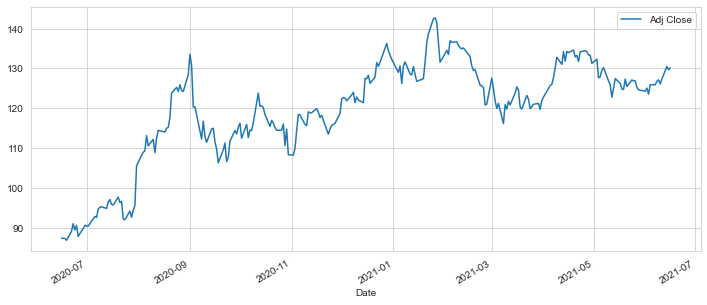

In [209]:

#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

<AxesSubplot:xlabel='Date'>

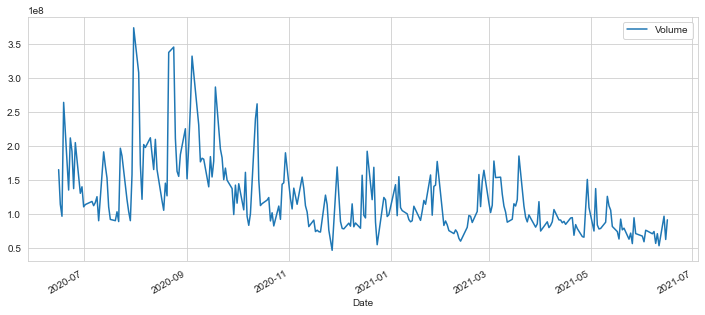

In [210]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

# What was the moving average of various stocks?
Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [211]:

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [212]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,126.110001,125.453999,125.817999,128.495406,-0.008023
2021-06-11,127.440002,126.099998,126.529999,127.349998,53415300.0,127.349998,125.660999,125.936999,128.603549,0.009833
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,130.479996,126.247999,126.088499,128.757320,0.024578
2021-06-15,130.600006,129.389999,129.940002,129.639999,62669300.0,129.639999,126.783999,126.256999,128.836390,-0.006438
2021-06-16,130.889999,128.460999,130.369995,130.149994,91605630.0,130.149994,127.292999,126.521999,128.919470,0.003934


<AxesSubplot:xlabel='Date'>

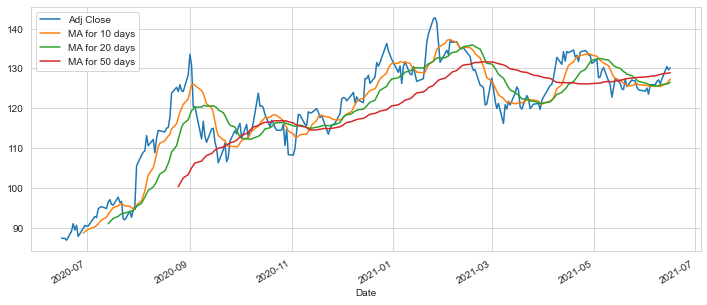

In [213]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

What was the daily return average of a stock?¶

In [214]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [215]:
AAPL['Daily Return'].tail()

Date
2021-06-10   -0.008023
2021-06-11    0.009833
2021-06-14    0.024578
2021-06-15   -0.006438
2021-06-16    0.003934
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

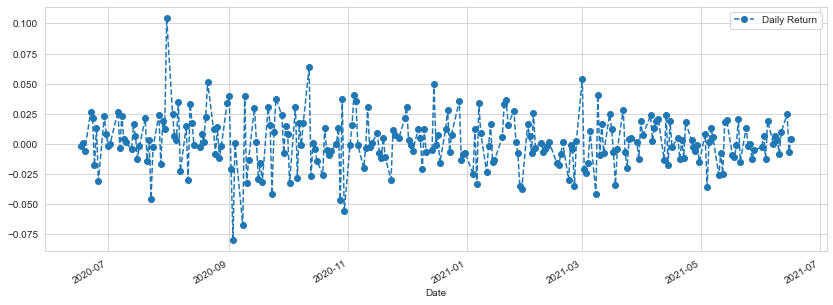

In [216]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

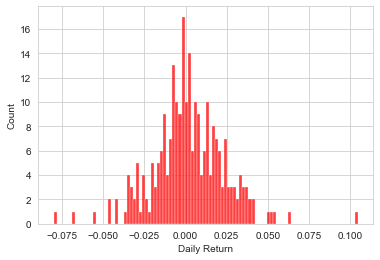

In [217]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

What was the correlation between daily returns of different stocks?¶

In [341]:
#Reading just the 'Adj Close' column this time
#stock_final.head(10)
close_df = stock_final[['Name','Close']].copy()
#close_df.Close
#close_df = close_df.groupby(['Name'])
#df = pd.DataFrame(close_df, index=['Date'],columns=close_df.Name.drop_duplicates())
#pd.to_datetime(close_df)
#dfs = [df.set_index('Date') for df in stock_final]
#pd.concat(df['Name'],axis=1)
# pivoting the dataframe
#close_df.index
#close_df=close_df.groupby('Name')
#close_df.columns = close_df.columns.droplevel(0)
#close_df.head(10)
#print(close_df.index)
#print(close_df.columns)
dates=close_df.index
#columns = close_df['Name'].unique()
#close_data = close_df['Close']
close_df=close_df.pivot(columns='Name',values="Close")
#print(df_t)
#print(close_data.index)
#print()
#close_df.loc[:,"Close"]
#print(close_data.columns.names)
#print(columns)
#df = pd.DataFrame(data=df_t,index=df_t.index, columns=columns)
#df

In [344]:
close_df.tail()

Name,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-06-10,126.110001,3349.649902,2521.600098,257.239990
2021-06-11,127.349998,3346.830078,2513.929932,257.890015
2021-06-14,130.479996,3383.870117,2527.040039,259.890015
2021-06-15,129.639999,3383.129883,2520.659912,258.359985
2021-06-16,130.149994,3415.250000,2513.929932,257.380005


Everything works as expected.

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [343]:
rets_df = close_df.pct_change()

In [345]:
rets_df.tail()

Name,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-06-10,-0.008023,0.020877,0.012122,0.014393
2021-06-11,0.009833,-0.000842,-0.003042,0.002527
2021-06-14,0.024578,0.011067,0.005215,0.007755
2021-06-15,-0.006438,-0.000219,-0.002525,-0.005887
2021-06-16,0.003934,0.009494,-0.002670,-0.003793


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

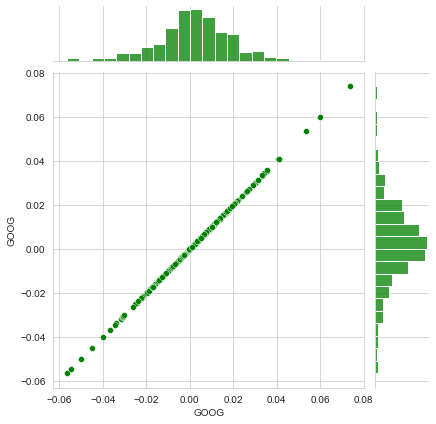

In [347]:
sns.jointplot(x='GOOG',y='GOOG',data=rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

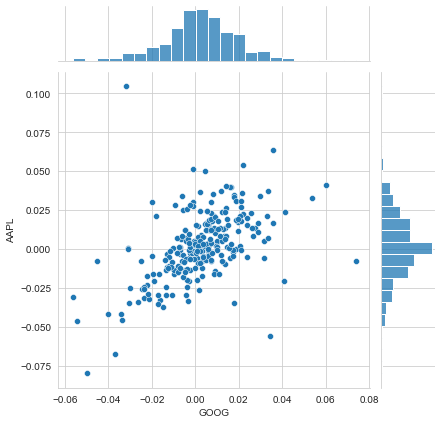

In [349]:
sns.jointplot(x='GOOG',y='AAPL',data=rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

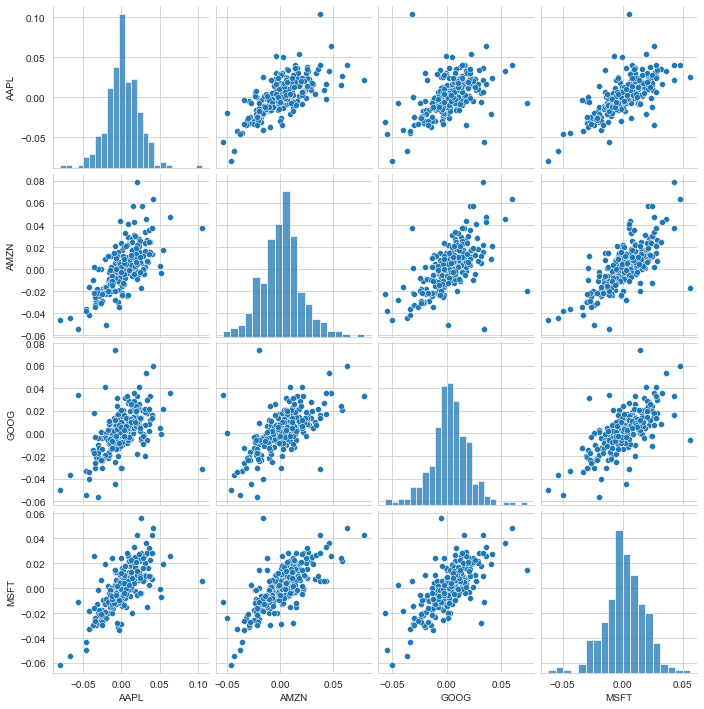

In [350]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

In [353]:
# Compute the correlation matrix
corr = rets_df.corr()

In [354]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:xlabel='Name', ylabel='Name'>

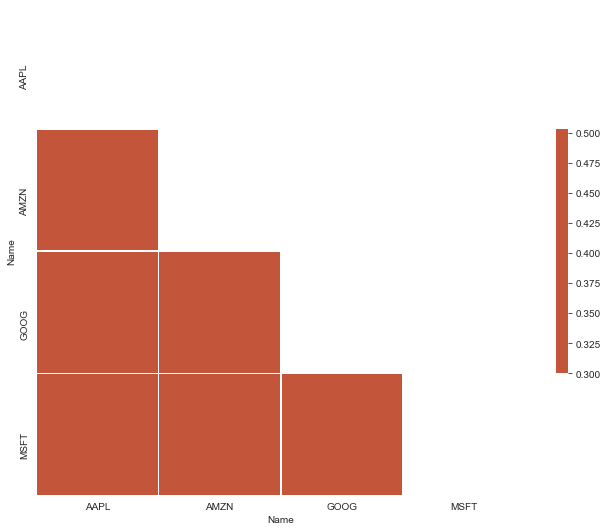

In [358]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?¶

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [396]:
rets = rets_df.dropna()
rets.head()

Name,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-06-17,-0.001392,0.009831,0.005822,0.003461
2020-06-18,0.000398,0.004922,-0.010447,0.010708
2020-06-19,-0.005715,0.007924,-0.002953,-0.005960
2020-06-22,0.026164,0.014508,0.014067,0.027774
2020-06-23,0.021345,0.018642,0.008644,0.006681


In [367]:
import matplotlib
print(matplotlib.__version__)

3.3.4


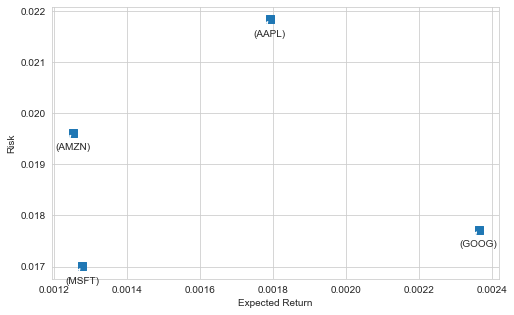

In [412]:
plt.figure(figsize=(8,5))

#plt.scatter(rets.mean(),rets.std(),s=25)
plt.scatter(rets.mean(),rets.std(), marker='s', s=50)
plt.xlabel('Expected Return')
plt.ylabel('Risk')



#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    '(%s)' %(label),
    xy=(x, y),     
    xytext=(0,-10),
    textcoords='offset points',     
    #ha = 'right',
    ha ='center',     
    #va = 'bottom',
    va='top',    
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

#plt.xlim([0,1])
#plt.ylim([0,1])
plt.show()


We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk

## Value at Risk¶

We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

###Bootstrap Method

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

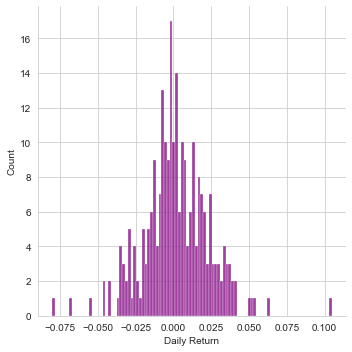

In [380]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [382]:

rets.head()

Name,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-06-17,-0.001392,0.009831,0.005822,0.003461
2020-06-18,0.000398,0.004922,-0.010447,0.010708
2020-06-19,-0.005715,0.007924,-0.002953,-0.005960
2020-06-22,0.026164,0.014508,0.014067,0.027774
2020-06-23,0.021345,0.018642,0.008644,0.006681


In [383]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.0331028596475019

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

### How can we attempt to predict future stock behaviour?¶

#### Monte Carlo Method

Check out this link for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

In [386]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [387]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [388]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-16,1455.020020,1425.900024,1445.219971,1442.719971,1709200,1442.719971
2020-06-17,1460.000000,1431.380005,1447.160034,1451.119995,1549600,1451.119995
2020-06-18,1451.410034,1427.010010,1449.160034,1435.959961,1581900,1435.959961
2020-06-19,1447.800049,1421.349976,1444.000000,1431.719971,3157900,1431.719971
2020-06-22,1452.750000,1423.209961,1429.000000,1451.859985,1542400,1451.859985


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

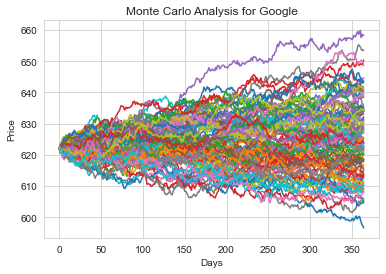

In [393]:
start_price = 622.049 #Taken from above
xrange = range
for run in xrange(0,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [394]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

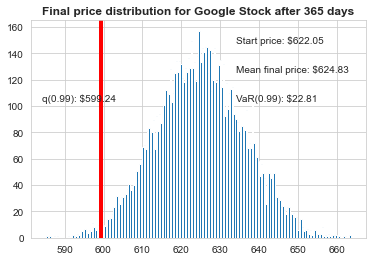

In [395]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05, and the average final price over 10,000 runs was USD623.36.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD18.38, 99% of the time.